In [14]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

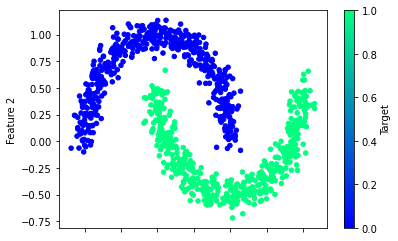

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
from sklearn.model_selection import train_test_split

# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [22]:
# Add our first Dense layer, including the input layer

#input_dim - how many inputs there will be
#units - how many neurons we want in the hidden layer
#activation - which activation function to use (ReLU)
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [23]:
# Add the output layer that uses a probability activation function
#units =1 because this is a classification output
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 958us/step - loss: 0.6168 - accuracy: 0.8107
Epoch 2/100
24/24 [==============================] - 0s 997us/step - loss: 0.6025 - accuracy: 0.8227
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.8320
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.8360
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.8360
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.8413
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.8427
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.8453
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.8507
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.8507
Epoch

24/24 [==============================] - 0s 988us/step - loss: 0.3010 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 881us/step - loss: 0.2993 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 896us/step - loss: 0.2985 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 841us/step - loss: 0.2977 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 883us/step - loss: 0.2970 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 898us/step - loss: 0.2963 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 881us/step - loss: 0.2955 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 876us/step - loss: 0.2948 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 958us/step - loss: 0.2941 - accuracy: 0.

<AxesSubplot:>

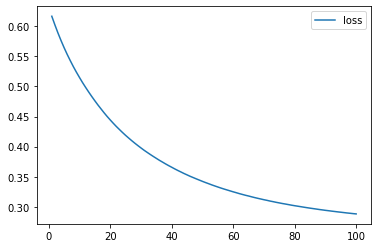

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

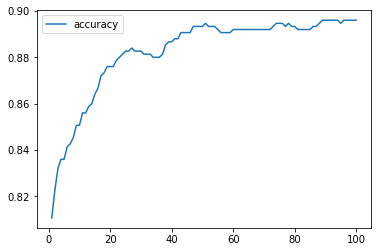

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [28]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [29]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 844us/step - loss: 1.1012 - accuracy: 0.2267
Epoch 2/100
24/24 [==============================] - 0s 999us/step - loss: 1.0339 - accuracy: 0.2013
Epoch 3/100
24/24 [==============================] - 0s 850us/step - loss: 0.9767 - accuracy: 0.1973
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9255 - accuracy: 0.2067
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8840 - accuracy: 0.2147
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8484 - accuracy: 0.2320
Epoch 7/100
24/24 [==============================] - 0s 944us/step - loss: 0.8176 - accuracy: 0.2373
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7923 - accuracy: 0.2427
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7694 - accuracy: 0.2667
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7483 - accuracy: 0.2747
E

24/24 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.9013
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9027
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9013
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9013
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9013
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9027
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2290 - accuracy: 0.9027
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9027
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9027
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9027
Epoch 91/100
